## 指数分布について

指数分布（Exponential Distribution）は、確率論と統計学において広く使用される分布の一つで、特に待ち時間や寿命などの連続的な時間間隔に関するモデルに適用されます。指数分布は無記憶性を持つ特徴から、ポアソン過程の時間間隔を記述するのに適しています。

### 定義

指数分布の確率密度関数 (PDF) は次のように表されます：

$$
f(x; \lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & x \geq 0 \\
0 & x < 0 
\end{cases}
$$

ここで、$\lambda$ は尺度パラメータで、$\lambda > 0$ です。$\lambda$ は平均発生率を意味し、期待値の逆数に対応します。

### 特性

指数分布の主な特性は次のとおりです：

1. **期待値（平均）**:
    $$ \mathbb{E}[X] = \frac{1}{\lambda} $$

2. **分散**:
    $$ \text{Var}(X) = \frac{1}{\lambda^2} $$

3. **累積分布関数 (CDF)**:
    $$ F(x; \lambda) = 
    \begin{cases}
    1 - e^{-\lambda x} & x \geq 0 \\
    0 & x < 0
    \end{cases}
    $$

4. **無記憶性**:
    指数分布は無記憶性（memoryless property）を持ちます。すなわち、任意の $s, t \geq 0$ に対して次が成り立ちます：
    $$ P(X > s + t \mid X > s) = P(X > t) $$

### 例

例えば、$\lambda = 2$ の場合、指数分布のPDFは次のようになります：

$$
f(x; 2) = 
\begin{cases} 
2 e^{-2x} & x \geq 0 \\
0 & x < 0 
\end{cases}
$$

この場合、期待値と分散は次のようになります：

- 期待値：$\mathbb{E}[X] = \frac{1}{2} = 0.5$
- 分散：$\text{Var}(X) = \frac{1}{2^2} = 0.25$

### Pythonでの実装例

指数分布から乱数を生成し、そのヒストグラムと理論的なPDFをプロットする例を示します。




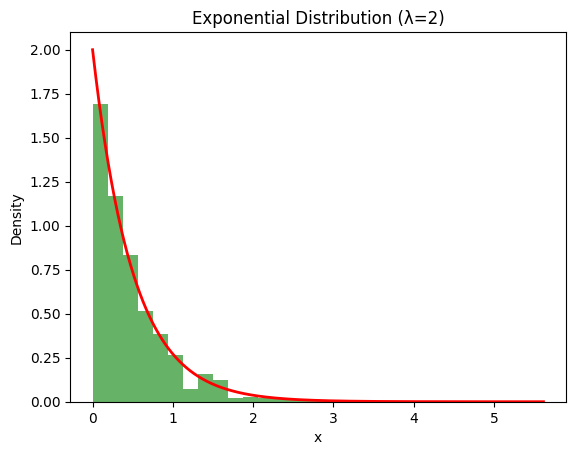

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# パラメータλの設定
lambda_param = 2

# 指数分布から1000個の乱数を生成
samples = np.random.exponential(1 / lambda_param, 1000)

# ヒストグラムをプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的なPDFをプロット
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, lambda_param * np.exp(-lambda_param * x), 'r-', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Exponential Distribution (λ={})'.format(lambda_param))
plt.show()

## 指数分布のモーメント母関数について

モーメント母関数（Moment Generating Function, MGF）は、確率分布のモーメントを求めるための有力なツールです。ここでは、指数分布のモーメント母関数を導出し、その性質を確認してみましょう。

### 定義

ある確率変数 $X$ のモーメント母関数は次のように定義されます：

$$
M_X(t) = \mathbb{E}[e^{tX}]
$$

ここで、$\mathbb{E}[\cdot]$ は期待値を表します。

### 指数分布のモーメント母関数の導出

指数分布 $X \sim \text{Exponential}(\lambda)$ に対して、モーメント母関数を導出します。

1. **定義に基づく計算**：

   $X \sim \text{Exponential}(\lambda)$ の場合、

   $$
   M_X(t) = \mathbb{E}[e^{tX}] = \int_{0}^{\infty} e^{tx} f_X(x) \, dx
   $$

   ここで、$f_X(x)$ は指数分布の確率密度関数 (PDF) です：

   $$
   f_X(x) = \lambda e^{-\lambda x} \quad (x \geq 0)
   $$

2. **積分を計算する**：

   $$
   M_X(t) = \int_{0}^{\infty} e^{tx} \lambda e^{-\lambda x} \, dx
   $$

   指数部分をまとめると：

   $$
   M_X(t) = \lambda \int_{0}^{\infty} e^{(t - \lambda)x} \, dx
   $$

3. **積分を実行**：

   ここで、積分が収束するためには $t < \lambda$ である必要があります。したがって、

   $$
   M_X(t) = \lambda \int_{0}^{\infty} e^{(t - \lambda)x} \, dx = \lambda \left[ \frac{e^{(t - \lambda)x}}{t - \lambda} \right]_{0}^{\infty}
   $$

   上限を $x \to \infty$ にすると、$t < \lambda$ の場合、指数関数の部分は $0$ になります。下限を $x = 0$ にすると、$e^{(t - \lambda) \cdot 0} = 1$ です。

   したがって、

   $$
   M_X(t) = \lambda \left[ 0 - \frac{1}{t - \lambda} \right] = \frac{\lambda}{\lambda - t}
   $$

### 結論

指数分布 $X \sim \text{Exponential}(\lambda)$ のモーメント母関数は次のように表されます：

$$
M_X(t) = \frac{\lambda}{\lambda - t} \quad (\text{for } t < \lambda)
$$

### モーメントの計算

モーメント母関数の $t$ による導関数を計算することで、モーメントを求めることができます。例えば、1次モーメント（平均）は $M_X(t)$ の1階導関数を $t = 0$ で評価することで得られます：

$$
\mathbb{E}[X] = M'_X(0)
$$

指数分布の場合、モーメント母関数を使って次のように計算できます：

1. **1階モーメント（平均）**：

   $$
   M_X(t) = \frac{\lambda}{\lambda - t}
   $$

   その1階導関数は、

   $$
   M'_X(t) = \frac{d}{dt} \left( \frac{\lambda}{\lambda - t} \right) = \frac{\lambda}{(\lambda - t)^2}
   $$

   これを $t = 0$ で評価すると、

   $$
   M'_X(0) = \frac{\lambda}{\lambda^2} = \frac{1}{\lambda}
   $$

   したがって、期待値は $\mathbb{E}[X] = \frac{1}{\lambda}$ です。

2. **2階モーメント**：

   $$
   M''_X(t) = \frac{d}{dt} \left( \frac{\lambda}{(\lambda - t)^2} \right) = \frac{2\lambda}{(\lambda - t)^3}
   $$

   これを $t = 0$ で評価すると、

   $$
   M''_X(0) = \frac{2\lambda}{\lambda^3} = \frac{2}{\lambda^2}
   $$

   2階モーメントは $\mathbb{E}[X^2] = \frac{2}{\lambda^2}$ です。

分散は次のように計算されます：

$$
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = \frac{2}{\lambda^2} - \left(\frac{1}{\lambda}\right)^2 = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}
$$

このようにして、指数分布のモーメント母関数を利用して、期待値や分散などのモーメントを求めることができます。

## 指数分布の無記憶性とは

指数分布（Exponential Distribution）の特性の一つに、無記憶性（Memorylessness）があります。この特性は、あるイベントが発生するまでの待ち時間が、これまでどれだけ待っていたかに依存しないことを意味します。

### 定義

無記憶性の正式な定義は次のとおりです：

確率変数 $X$ が指数分布 $X \sim \text{Exponential}(\lambda)$ に従う場合、任意の $s, t \geq 0$ に対して次の等式が成り立ちます：

$$
P(X > s + t \mid X > s) = P(X > t)
$$

これは、すでに時間 $s$ だけ待った後の残りの待ち時間が、元の待ち時間分布と同じであることを示します。

### 証明

指数分布の無記憶性を証明してみましょう。

1. **条件付き確率の計算**：

   無記憶性の性質を証明するために、条件付き確率を計算します：

   $$
   P(X > s + t \mid X > s) = \frac{P(X > s + t \text{ and } X > s)}{P(X > s)}
   $$

   ここで、$X > s + t$ なら $X > s$ も必ず成り立つため、

   $$
   P(X > s + t \text{ and } X > s) = P(X > s + t)
   $$

   したがって、

   $$
   P(X > s + t \mid X > s) = \frac{P(X > s + t)}{P(X > s)}
   $$

2. **指数分布の累積分布関数 (CDF)**：

   指数分布の累積分布関数は次のようになります：

   $$
   P(X > x) = 1 - F(x) = 1 - \left(1 - e^{-\lambda x}\right) = e^{-\lambda x}
   $$

   したがって、

   $$
   P(X > s + t) = e^{-\lambda (s + t)}
   $$

   および、

   $$
   P(X > s) = e^{-\lambda s}
   $$

3. **比を計算する**：

   以上の結果を用いて、条件付き確率の比を計算します：

   $$
   P(X > s + t \mid X > s) = \frac{e^{-\lambda (s + t)}}{e^{-\lambda s}} = \frac{e^{-\lambda s} \cdot e^{-\lambda t}}{e^{-\lambda s}} = e^{-\lambda t}
   $$

4. **結論**：

   $$
   P(X > s + t \mid X > s) = e^{-\lambda t} = P(X > t)
   $$

   これにより、指数分布の無記憶性が証明されました。

### 直感的な説明

無記憶性を直感的に理解するには、次の例を考えてみます。

例えば、ある機械の故障までの時間が指数分布に従うとします。無記憶性の特性により、既にその機械が10時間動作している場合でも、その機械がさらに1時間故障せずに動作する確率は、新品の機械が1時間故障せずに動作する確率と同じです。つまり、過去の動作時間が将来の故障時間に影響を与えないということです。

この特性は、電話交換機の待ち時間や放射性崩壊のような現象のモデリングにおいて非常に有用です。

## 指数分布の無記憶性とは

指数分布（Exponential Distribution）の特性の一つに、無記憶性（Memorylessness）があります。この特性は、あるイベントが発生するまでの待ち時間が、これまでどれだけ待っていたかに依存しないことを意味します。

### 定義

無記憶性の正式な定義は次のとおりです：

確率変数 $X$ が指数分布 $X \sim \text{Exponential}(\lambda)$ に従う場合、任意の $s, t \geq 0$ に対して次の等式が成り立ちます：

$$
P(X > s + t \mid X > s) = P(X > t)
$$

これは、すでに時間 $s$ だけ待った後の残りの待ち時間が、元の待ち時間分布と同じであることを示します。

### 証明

指数分布の無記憶性を証明してみましょう。

1. **条件付き確率の計算**：

   無記憶性の性質を証明するために、条件付き確率を計算します：

   $$
   P(X > s + t \mid X > s) = \frac{P(X > s + t \text{ and } X > s)}{P(X > s)}
   $$

   ここで、$X > s + t$ なら $X > s$ も必ず成り立つため、

   $$
   P(X > s + t \text{ and } X > s) = P(X > s + t)
   $$

   したがって、

   $$
   P(X > s + t \mid X > s) = \frac{P(X > s + t)}{P(X > s)}
   $$

2. **指数分布の累積分布関数 (CDF)**：

   指数分布の累積分布関数は次のようになります：

   $$
   P(X > x) = 1 - F(x) = 1 - \left(1 - e^{-\lambda x}\right) = e^{-\lambda x}
   $$

   したがって、

   $$
   P(X > s + t) = e^{-\lambda (s + t)}
   $$

   および、

   $$
   P(X > s) = e^{-\lambda s}
   $$

3. **比を計算する**：

   以上の結果を用いて、条件付き確率の比を計算します：

   $$
   P(X > s + t \mid X > s) = \frac{e^{-\lambda (s + t)}}{e^{-\lambda s}} = \frac{e^{-\lambda s} \cdot e^{-\lambda t}}{e^{-\lambda s}} = e^{-\lambda t}
   $$

4. **結論**：

   $$
   P(X > s + t \mid X > s) = e^{-\lambda t} = P(X > t)
   $$

   これにより、指数分布の無記憶性が証明されました。

### 直感的な説明

無記憶性を直感的に理解するには、次の例を考えてみます。

例えば、ある機械の故障までの時間が指数分布に従うとします。無記憶性の特性により、既にその機械が10時間動作している場合でも、その機械がさらに1時間故障せずに動作する確率は、新品の機械が1時間故障せずに動作する確率と同じです。つまり、過去の動作時間が将来の故障時間に影響を与えないということです。

この特性は、電話交換機の待ち時間や放射性崩壊のような現象のモデリングにおいて非常に有用です。
